# **STINTSY Machine Learning Project**

## Members ##

CAASI, Samantha Nicole L. 

GUTIERREZ, Carlos Kristoffer

MARCELLANA, John Patrick T.

MURIEL, Gabriel I.

## **I. Overview**

### **Problem Statement**
 The dataset's **primary goal** is to understand and predict productivity performance by focusing on the output of teams involved in the garments manufacturing industry. Given the labor-intensive nature of the garment manufacturing industry and the numerous productivity factors that affect it, this dataset is useful for examining these aspects and forecasting productivity results.

### **Target Task**
  Since `actual_productivity`, the main feature of interest, is a continuous variable with a range of 0 to 1, a regression task would be suitable in this case, where we predict the `actual_productivity`.


## **II. Description of the dataset**



#### **Dataset Description**
The garment manufacturing industry gathers the garment dataset to assess teams' productivity. It records precise time data on day-to-day operations, team structures, and production rates. The manually compiled information, which industry professionals have verified, is intended to support productivity monitoring, analysis, and forecasting in the apparel manufacturing sector.

#### **Data Collection Process**
The dataset was **gathered by hand** and verified by professionals in the field. Although manual data collection suggests high dependability, it may also add biases or human error, which could affect the conclusions' precision and generalizability.

#### **Dataset Structure**
**Rows**: Every row represents a productivity instance for a particular team that manufactures garments on a certain day.
**Columns**: The dataset contains 15 columns, representing different attributes related to productivity.

#### **Dataset Composition**
**Number of Instances**: 1,197 observations.
**Number of Features**: 15 features in total, each capturing an aspect relevant to garment manufacturing productivity.

#### **Feature Descriptions**
* **date**: Date of the recorded instance in MM-DD-YYYY format.
* **quarter**: Month divided into four quarters.
* **department**: Department associated with the instance, either sewing or finishing.
* **day**: Day of the week for the recorded instance.
* **team**: Team number associated with the observation.
* **targeted_productivity:** Targeted productivity level set by authorities for each team per day.
* **smv (Standard Minute Value)**: Time allocated for specific tasks.
* **wip (Work in Progress)**: Count of unfinished items; has missing values.
* **over_time:** Overtime (in minutes) recorded for each team.
* **incentive**: Financial incentives provided to motivate productivity.
* **idle_time**: Time during which production was interrupted.
* **idle_men**: Number of workers idle due to interruptions.
* **no_of_style_change**: Count of style changes for the products.
* **no_of_workers**: Total workers in each team.
* **actual_productivity**: Actual productivity achieved, which ranges from 0 to slightly over 1.

## **III. List of Requirements**
List all the Python libraries and modules that you used.
* pandas
* sklearn
* numpy as np
* matplotlib
* seaborn

## **IV. Data preprocessing and cleaning**


### **Imports**

In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Loading the Dataset** <br>


We will load the dataset using `pandas`

In [2]:
data = pd.read_csv('./garments.csv')

### **Overview of the Dataset** <br>


Let's examine sample values from each column to better understand the dataset. 

In [3]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


From the output above, the dataset contains a total of **13** features: **4** categorical features (`quarter`, `department`, `day`, and `team`) and **9** continuous features (`targeted_productivity`, `smv`, `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, `no_of_style_change`, and `no_of_workers`)

We can gain a better understanding of our dataset by reviewing general information about each column, including data types, non-null counts, and the presence of any missing values

In [4]:
print("\nDataset Information:")
display(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-nu

None

The dataset contains a total of **1,197** instances, with only one feature, `wip`, having missing values

### **Dropping of `date` feature**


As a first pre-processing step, we need to determine which features should we use in determining the actual_productivity of an instnace. Since the `quarter` and `day` columns already capture essential temporal features, hence, we will drop the `date` column. The `quarter` represents the broader time frame for each month while `day` provides granular weekly patterns. The `date` represent specific dates that might introduce noise or overfit the models to patterns rather than generalize trends

In [5]:
data = data.drop('date', axis=1)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


### **Checking for missing values** <br>


Earlier, we identified `wip` as the only feature with missing values. Let's validate this observation to confirm if it truly is the only one.

In [6]:
print("\nMissing Values in Each Column:")
display(data.isnull().sum())


Missing Values in Each Column:


quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Since the `wip` variable has missing values and amounting to almost half the dataset, we will fill the missing rows

Let's first visualize the distribution of the `wip` feature. If the distribution is normal, we can fill the missing rows with the mean. If the distribution is skewed, we can fill it with the median of the column.

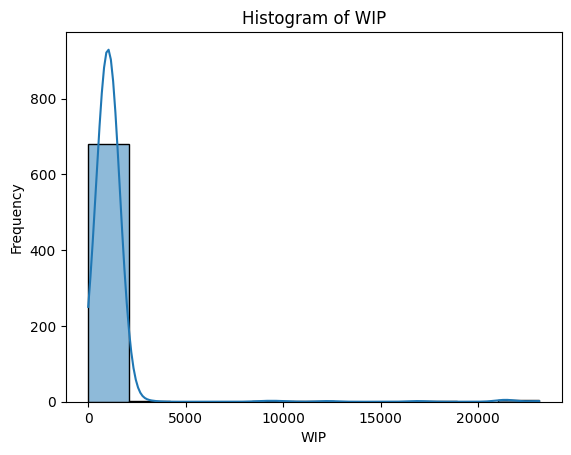

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['wip'], kde=True, bins=11)  
plt.title('Histogram of WIP')
plt.xlabel('WIP')
plt.ylabel('Frequency')
plt.show()


Given the skewness of the data, the median could be a suitable choice for filling missing values. However, in this dataset, `wip` represents 'work in progress,' and a missing value might indicate no unfinished work for that specific instance. Therefore, it would be more appropriate to fill the missing values with **0** instead.

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0)
data['wip'] = imputer.fit_transform(data[['wip']])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Checking for duplicate instances in our dataset**

We need to ensure that there are no redundant entries that could bias your analysis or model results. Let's check if we have any duplicates in our data and display these rows.

In [9]:
duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

if duplicate_rows.sum() > 0:
    print("\nDuplicate Rows:")
    display(data[duplicate_rows])


Number of duplicate rows: 0


Since there are no duplicate data, we don't need to do anything for it

### **Handling Data Inconsistencies**

In [10]:
print(data['department'].unique())

['sweing' 'finishing ' 'finishing']


In the `department` column, our data is supposed to have either **sewing** or **finishing** only. However, the 'sewing' value has incorrect spelling, and there is an extra space in some 'finishing' values. Therefore, we need to handle them.

In [11]:
data['department'] = data['department'].replace('sweing', 'sewing')
data['department'] = data['department'].replace('finishing ', 'finishing')

# Display unique values to verify the change
print("Unique values in 'department' column after correction:")
print(data['department'].unique())

Unique values in 'department' column after correction:
['sewing' 'finishing']


### **Label Encoding**

Let's use `sklearn.preprocessing.LabelEncoder` to encode our labels of some of our features such as **quarter**, and **department**

Instantiate a LabelEncoder object.

In [12]:
label_encoder = sklearn.preprocessing.LabelEncoder()

Fit the `quarter` feature by calling the `fit()` function of the object.

In [13]:
label_encoder.fit(data['quarter'])

LabelEncoder()

Display the classes.

In [14]:
label_encoder.classes_

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Thus, labels will be transformed from string values to their corresponding integer values:
- `Quarter 1` - `0`
- `Quarter 2` - `1`
- `Quarter 3` - `2`
- `Quarter 4` - `3`
- `Quarter 5` - `4`

Transform the `quarter` feature by calling the `transform()` function of the object.


In [15]:
data['quarter'] = label_encoder.transform(data['quarter'])
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


Let's do the same for the `department`feature

The `department` labels will be transformed from string values to their corresponding integer values:

- `finishing` - `0`
- `sewing` - `1`

In [16]:
label_encoder.fit(data['department'])
data['department'] = label_encoder.transform(data['department'])
data


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Ordinal Encoding**

To transform our feature `day` to numerical features, we will use ordinal encoding. We can create a dictionary that will map string values in the `day` feature to its corresponding integer value according to some order

- `Sunday` - `0`
- `Monday` - `1`
- `Tuesday` - `2`
- `Wednesday` - `3`
- `Thursday` - `4`
- `Friday` - `5`
- `Saturday` - `6`
- `Sunday` - `7`

In [17]:
data_day_dict = {
  'Sunday': 0,
  'Monday': 1,
  'Tuesday': 2,
  'Wednesday': 3,
  'Thursday': 4,
  'Friday': 5,
  'Saturday': 6,
  'Sunday': 7
}

We will use the `map()` function to transform the `day` feature to its correspomding ordinal value

In [18]:
data['day'] = data['day'].map(data_day_dict)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,1,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0,0,4,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,1,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,1,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,1,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1,0,3,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,1,0,3,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,1,0,3,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,1,0,3,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


### **Changing of Data Types**


The `no_of_workers` column should contain whole numbers, as it represents a count of workers, and workers cannot be fractional. Therefore, we need to change its data type to integer.

Our approach is to truncate the decimal points to minimize the impact on the data, as rounding up could artificially inflate the worker count.

In [19]:
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))

# Verify the change
print(data['no_of_workers'].head())
print("Data type after flooring:", data['no_of_workers'].dtype)


0    59
1     8
2    30
3    30
4    56
Name: no_of_workers, dtype: int64
Data type after flooring: int64


## **V. Exploratory Data Analysis**

This exploratory data analysis investigates the factors influencing the `actual_productivity` in the garments industry, examining relationships between productivity and variables such as team performance, work schedules, incentives, and operational disruptions, to uncover patterns and insights that drive productivity outcomes.

### What is the distribution of `actual_productivity`?

Let's get a visualization first of the distribution of our target variable. This will help identify if the distribution is skewed or normally distributed. Understanding the distribution of the target variable helps identify potential issues like skewness or imbalanced data.

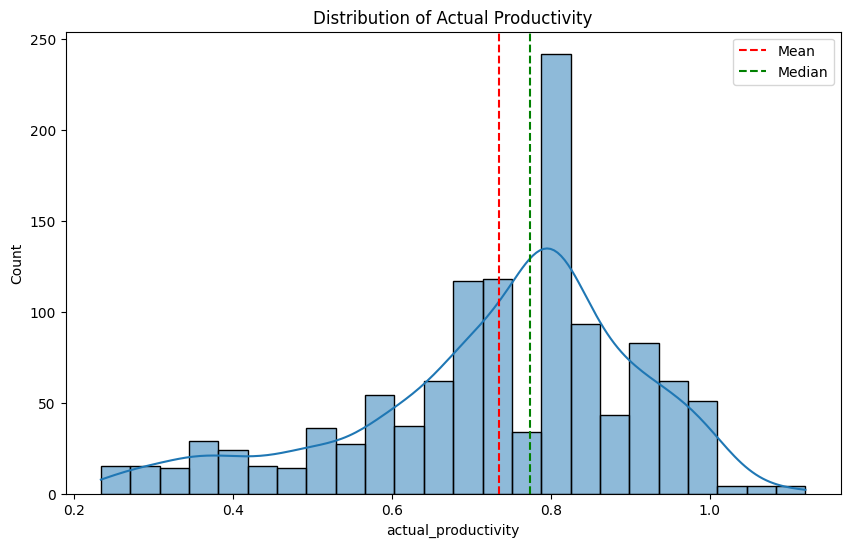

In [20]:
# Plot the distribution of actual_productivity
plt.figure(figsize=(10, 6))
sns.histplot(data['actual_productivity'], kde=True)
plt.title('Distribution of Actual Productivity')
plt.axvline(data['actual_productivity'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['actual_productivity'].median(), color='green', linestyle='--', label='Median')
plt.legend()
plt.show()

1. Distribution of Actual Productivity:
- Most teams operate at around 80% productivity (highest peak with 240 cases)
- Second most common is 65-70% productivity (about 120 cases)
- Very few teams achieve above 95% or below 40% productivity
- Average (mean) productivity is 75%
- Middle value (median) productivity is 80%

2. Findings:
- Normal Performance: 80% productivity is typical
- Room for Improvement: Many teams at 65-70% could potentially improve to 80%
- Exceptional Cases: Few teams reach over 90% productivity
- Poor Performance: Rare cases below 40% productivity need investigation

### What is the distribution of the feature `quarter`?

To gain a clearer understanding of our categorical variables, let's explore the distribution of each, starting with `quarter`. This will help us determine if there are equal instances for each quarter of the month.

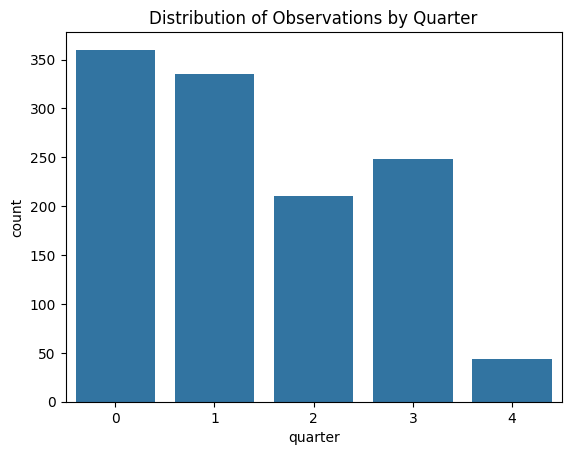

In [21]:
sns.countplot(data=data, x='quarter')
plt.title("Distribution of Observations by Quarter")
plt.show()

The visualization reveals that the majority of instances are concentrated in Quarter 1 and Quarter 2 of the month, indicating that most data points are from the first half of the month.

### What is the distribution of the feature `day`

Now, let's visualize the distribution of the feature `day` as this will help us determine if the number of instances in each day are equally distributed or some days of the week have more data.

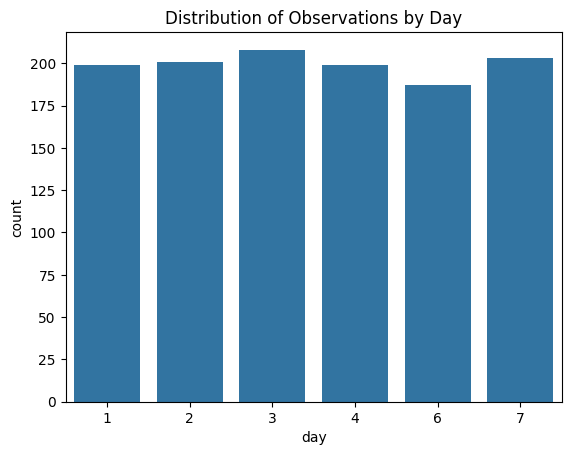

In [22]:
sns.countplot(data=data, x='day')
plt.title("Distribution of Observations by Day")
plt.show()

Using a numerical representation where 1 corresponds to **Sunday** and 7 corresponds to **Saturday**, this visualization illustrates that the distribution of instances is nearly uniform across the days of the week. However, there is a notable exception for **Fridays**, which show no recorded instances.

### What is the distribution of the feature `department`

Let's also visualize the distribution of the feature `department`. This will help us determine if one department has more instances than the other

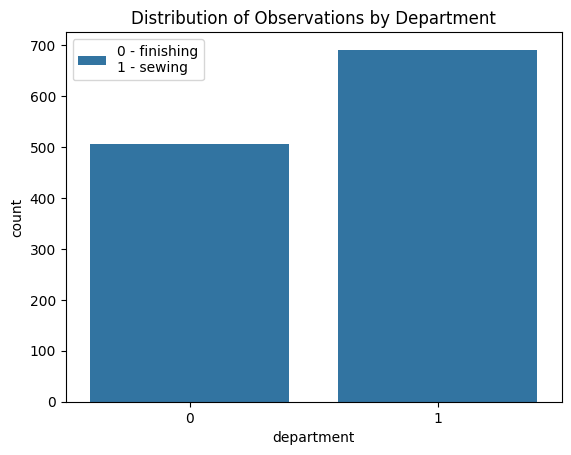

In [23]:
sns.countplot(data=data, x='department')
plt.title("Distribution of Observations by Department")
plt.legend(["0 - finishing""\n1 - sewing"])
plt.show()

Based on the chart above, it indicates that there are significantly more instances in the `sewing` department compared to the `finishing` department.

### What are the distribution of the numerical features?

Determining the distribution of our numerical features will help us better understand our data and will help us determine if the features have skewed distributions that may require normalization in order to enhance the performance of models later on

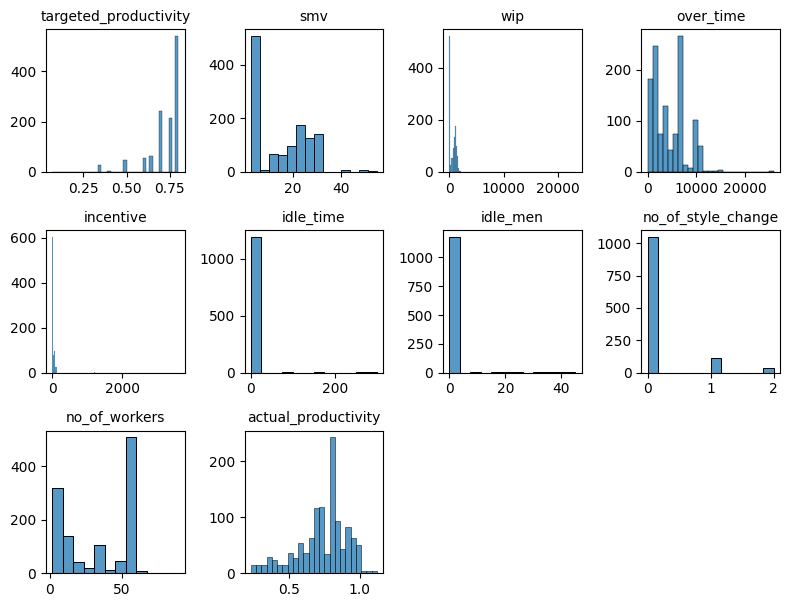

In [24]:
data_num = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.histplot(x=data[col])
    plt.title(col, fontsize=10)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Most of our features have a skewed distribution, with the majority of their values close to **0**. Some features contain visible outliers that should be addressed to prevent them from negatively impacting the performance of the models.

Let's further discuss some relevant patterns in each of these distributions.

#### Distribution of SMV (Standard Minute Value)

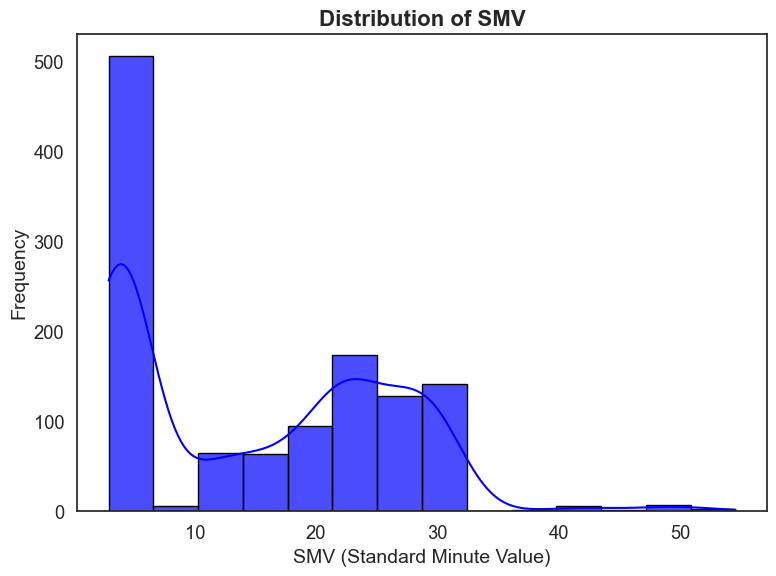

In [25]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='smv', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of SMV", fontsize=16, fontweight='bold')
plt.xlabel("SMV (Standard Minute Value)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**SMV (Standard Minute Value)** This feature is the allocated time it takes to finish a task. The lower bound indicates a higher frequency value indicating that in most days, allocated time for a task takes short amount of time. However, we can observe that there is a huge drop in frequency for days that tasks takes around 20 minutes to accomplish. Lastly, there are very few tasks that takes more than 40 minutes to accomplish. Based on this data, some insights can be inferred. A shorter task for a given day indicates that a task is simple while for outliers such as higher allocation time indicates a more complex task. With these observations, we can leverage the values of SMV especially in the higher range of values to understand its impact on the actual productivity. 

#### Distribution of Overtime (OT)

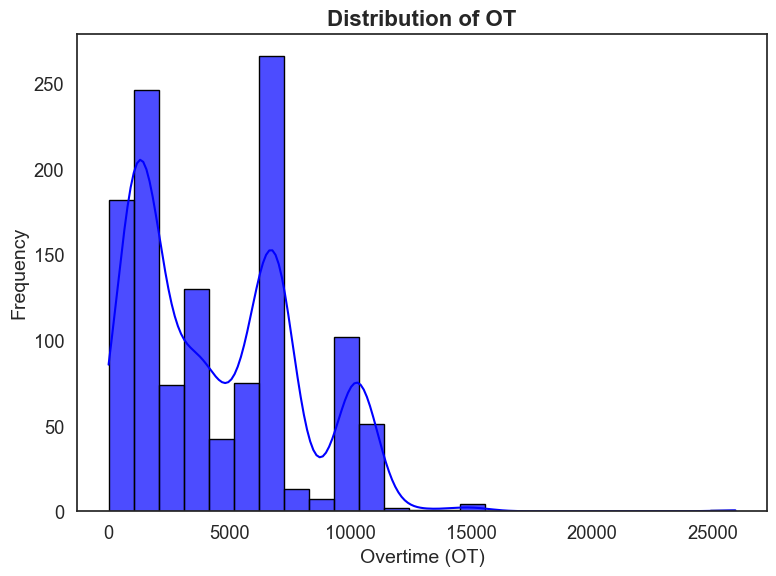

In [26]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='over_time', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of OT", fontsize=16, fontweight='bold')
plt.xlabel("Overtime (OT)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**Over Time (OT)**. Extreme outliers can be observed such as instances where OT went over 20000 minutes. We also observed that the values are concentrated from the lower values. If we are to represent this as the number of overtime in minutes for a given day, then these outliers and frequent data points might represent unrealistic values. Misinterpretations of data might be possible because of how this feature integrated into the dataset such as one instance or a day might represent more than a day. Nevertheless, having excessive overtime means that the teams may have overworked a few times. To integrate this with our model, proper scaling techniques should be observed and in this case where values are large, we need to scale it down to make it more realistic. 

#### Distribution of Number of Workers 

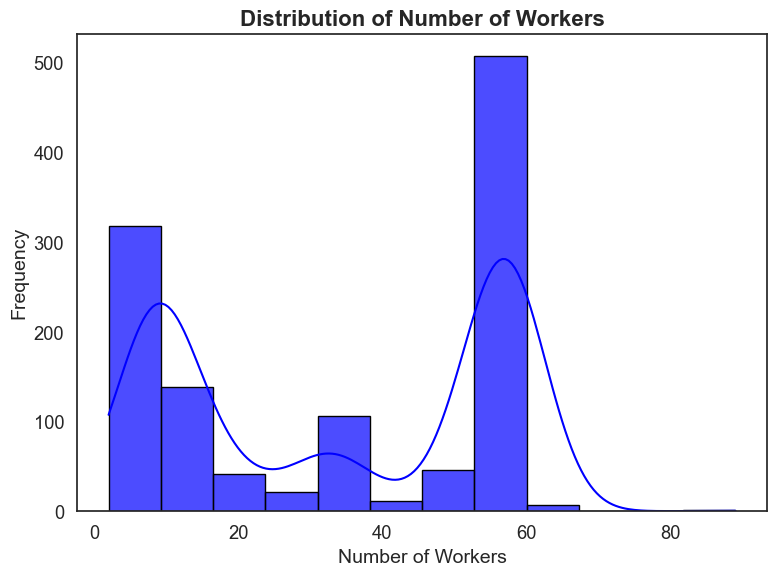

In [27]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='no_of_workers', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of Number of Workers", fontsize=16, fontweight='bold')
plt.xlabel("Number of Workers", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**Number of Workers.** The frequency distribution of this feature shows that most instances have more than 50 workers in their team. In the lower range that represents smaller workers, we can also observe a frequent pattern. On the opposite observation where instances have low frequency, these resides in the middle. An initial observation here is that larger teams are most common in the industry workflow. As for determining its relevance to the target variable, we will be further analyzing the correlation between the allocated time to the number of workers.

#### Distribution of WIP

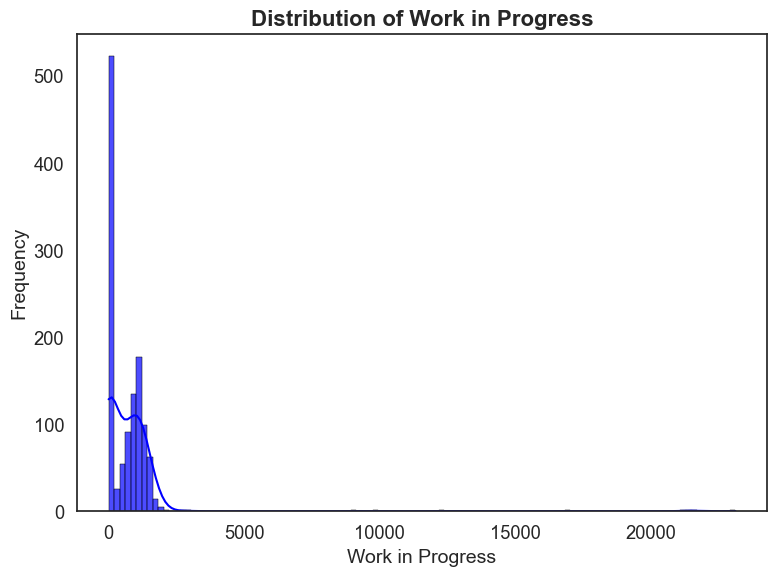

In [28]:
sns.set_style("white") 
sns.set_context("notebook", font_scale=1.2)

plt.figure(figsize=(8, 6)) 
sns.histplot(data=data, x='wip', kde=True, color='blue', alpha=0.7, edgecolor="black")

plt.title("Distribution of Work in Progress", fontsize=16, fontweight='bold')
plt.xlabel("Work in Progress", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.tight_layout()

plt.show()

**WIP (Work in Progress)**. This feature shows how many unfinished items for a given day. Earlier, we performed a preprocessing of data that changed a null value from zero to indicate that there is no unfinished items for that day. We can observe that these zeroes are frequent as well in the distribution which shows that most of the days, no pending unfinished items are listed. 

### How are the features correlated with `actual_productivity`?

To highlight which features have strong relationships with the target variable, let's plot a heatmap showing the correlation of the `actual_productivity` with each feature. This helps prioritize features for model building and decide on potential feature interactions to explore further.

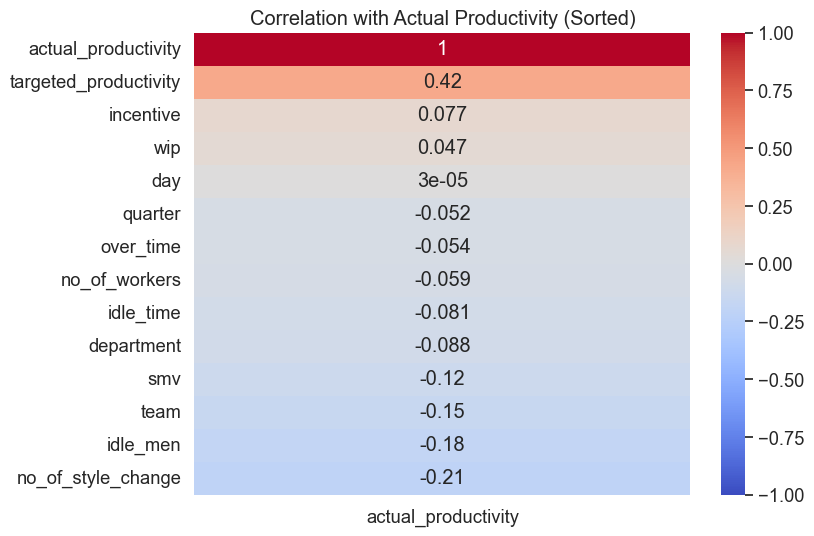

In [29]:
correlation_matrix = data.corr()
actual_productivity_corr = correlation_matrix[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(actual_productivity_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', cbar=True)
plt.title("Correlation with Actual Productivity (Sorted)")
plt.show()

The heatmap illustrates the correlation between various `features` and `actual_productivity`, highlighting key relationships within the dataset. Among all features, `targeted_productivity` shows the strongest positive correlation (0.42) with `actual_productivity`, indicating that higher targets are often associated with higher achieved productivity. 

Weak positive correlations are observed for `incentive` (0.077) and `wip` (0.047), suggesting minimal contributions to productivity. Conversely, features like `idle_men` (-0.18), `team` (-0.15), `idle_time` (-0.081), and `no_of_style_change` (-0.21) exhibit negative correlations, implying that inefficiencies, such as idle workers or frequent style changes, reduce productivity. Features like `quarter`, `day`, and `over_time` have near-zero correlations, indicating limited impact on productivity. 

### How does actual_productivity vary by `department` and `team`?

We'll explore how does each department and team relate to actual_productivty. Exploring group-based variations helps reveal systemic differences or patterns in productivity tied to specific teams or departments. 

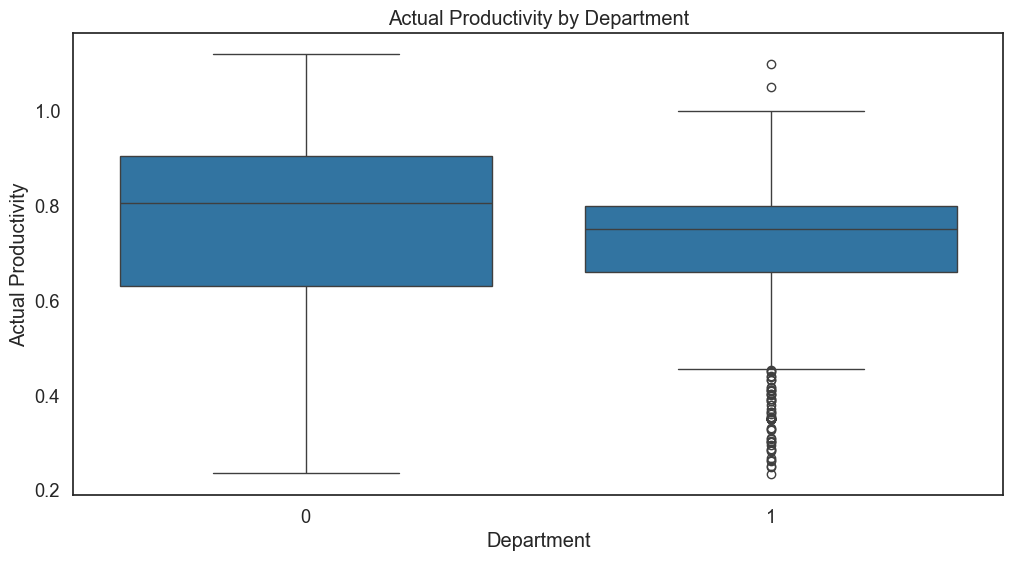

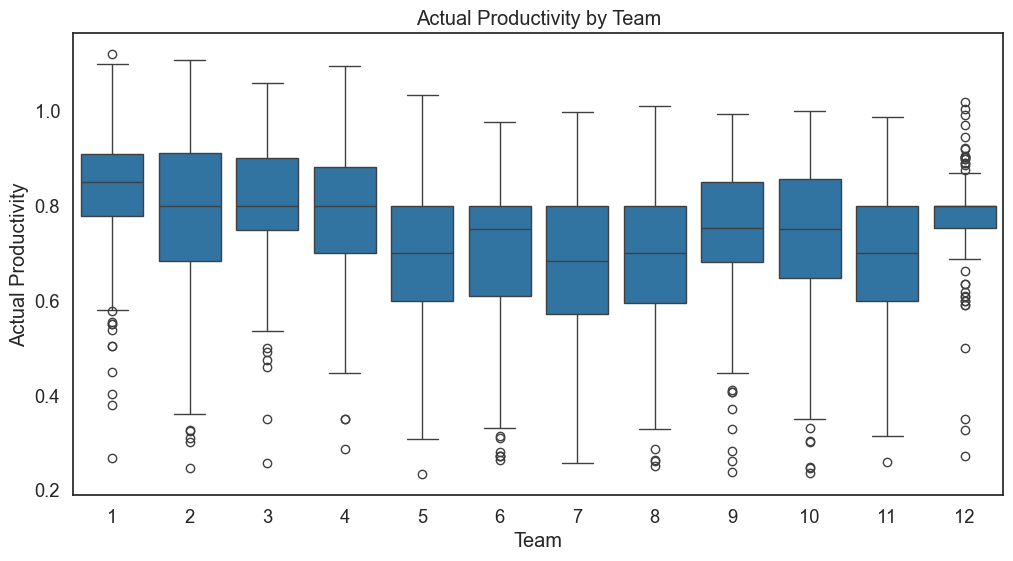

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='actual_productivity', data=data)
plt.title('Actual Productivity by Department')
plt.xlabel('Department')
plt.ylabel('Actual Productivity')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='team', y='actual_productivity', data=data)
plt.title('Actual Productivity by Team')
plt.xlabel('Team')
plt.ylabel('Actual Productivity')
plt.show()


**Actual Productivity by Department**: The boxplot compares the `actual_productivity` of the Finishing department (0) and the Sewing department (1). The Finishing department demonstrates higher median productivity with a more consistent performance, as indicated by its narrower interquartile range and fewer outliers. In contrast, the Sewing department exhibits lower median productivity and greater variability, with numerous outliers at the lower end reflecting instances of significantly reduced performance. While the Sewing department has a broader range of productivity, the presence of these outliers suggests operational inefficiencies or challenges impacting consistency. 

**Actual Productivity by Team**: This boxplot illustrates the actual productivity levels for different teams (1 through 12). The median productivity across teams shows some variability, with several teams achieving relatively high medians (e.g., Teams 1, 2, and 12), while others display lower medians (e.g., Teams 8 and 10). Teams 1 and 12, in particular, exhibit consistent performance, as indicated by their relatively narrow interquartile ranges (IQRs), while other teams, such as 2, 6, and 11, show wider IQRs, suggesting greater variability in performance. Outliers are present for most teams, primarily at the lower end of productivity, indicating instances of significantly reduced performance. Teams 6, 8, and 10 have a particularly notable number of outliers, which may highlight operational challenges or inconsistencies in these teams. Overall, while some teams show stable and high performance, others face variability and performance dips that warrant further investigation to identify and address potential inefficiencies.

###  How do numerical features (e.g., `smv`, `over_time`, `incentive`, etc.) relate to `actual_productivity?

Let's examine how does these features relate to our target_variable. Our heatmap earlire shows little to no correlation with it, and examining the correlation of each might help us understand it better.

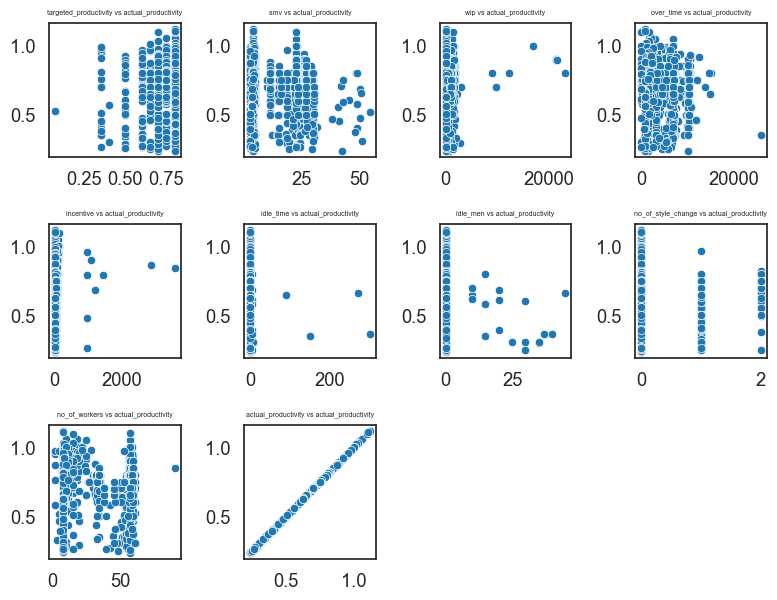

In [31]:
data_num = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.scatterplot(data=data, x=col, y='actual_productivity')
    plt.title(f"{col} vs actual_productivity", fontsize=5)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()


These scatter plots visualize the relationship between actual_productivity and various features in the dataset. Each chart highlights how individual features correlate with productivity, revealing several key patterns.

- `targeted_productivity` vs `actual_productivity`: There is a noticeable positive trend, indicating that higher targeted productivity is often associated with higher actual productivity, though the spread suggests variability.

- `smv` (Standard Minute Value) vs `actual_productivity`: The data shows a broad distribution with no clear trend, suggesting a weak correlation between SMV and actual productivity.

- `wip` (Work in Progress) vs `actual_productivity`: The points are concentrated near low wip values, with no clear relationship evident.

- `over_time` vs `actual_productivity`: A wide spread of points across all ranges of productivity indicates that overtime does not have a strong or consistent relationship with productivity.

- `incentive` vs `actual_productivity`: Most points cluster around lower incentive values, with no obvious trend connecting incentives to productivity.

- `idle_time` vs `actual_productivity`: The scatter suggests a negative relationship; higher idle times tend to align with lower productivity, though most points cluster at low idle times.

- `idle_men` vs `actual_productivity`: Similar to idle_time, higher numbers of idle workers seem to correspond with reduced productivity, but most data points are concentrated at lower values of idle men.

- `no_of_style_change` vs `actual_productivity`: The discrete nature of this feature shows distinct clusters, but there is no strong correlation visible with productivity.

- `no_of_workers` vs `actual_productivity`: A wide spread of points suggests no clear relationship between the number of workers and actual productivity, although most data points are concentrated around lower worker counts.

- `actual_productivity` vs itself: This plot serves as a reference and naturally forms a perfect linear relationship, as expected.

### What are the temporal trends in `actual_productivity`?

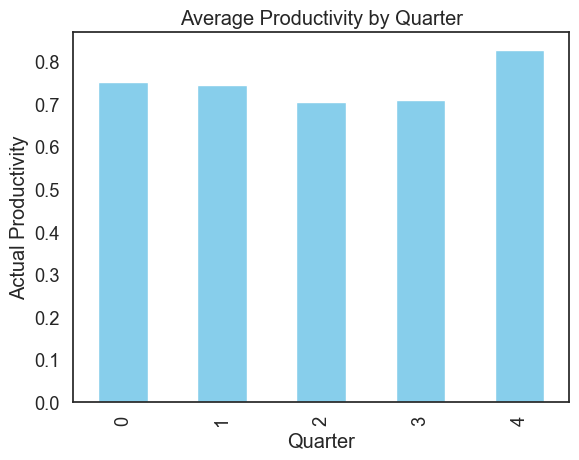

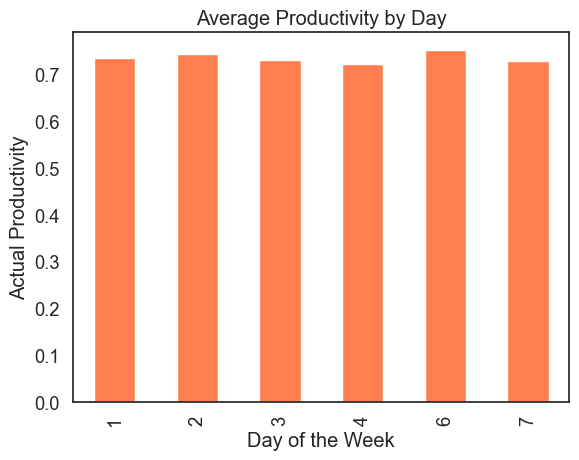

In [32]:
# Productivity by quarter
quarterly_avg = data.groupby('quarter')['actual_productivity'].mean()
quarterly_avg.plot(kind='bar', color='skyblue', title='Average Productivity by Quarter', ylabel='Actual Productivity', xlabel='Quarter')
plt.show()

# Productivity by day of the week
day_avg = data.groupby('day')['actual_productivity'].mean()
day_avg.plot(kind='bar', color='coral', title='Average Productivity by Day', ylabel='Actual Productivity', xlabel='Day of the Week')
plt.show()


The first graph shows that most teams tend to be more productive during the last quarter of the month. This pattern could be influenced by several factors, such as the proximity to payday, which may motivate employees to perform at a higher level. Additionally, it is observed that productivity is lowest around the middle of the month, suggesting that this period may experience a natural dip in performance.

The second graph reveals that productivity is relatively consistent across the days of the week, with Saturday (Day 6) being the most productive day. On the other hand, Thursday (Day 4) shows the least productivity, though the difference between these days is minimal. This suggests that, while there are slight fluctuations, overall productivity does not vary significantly by day of the week.

### What is the impact of `incentive` and `over_time` on `actual_productivity`?

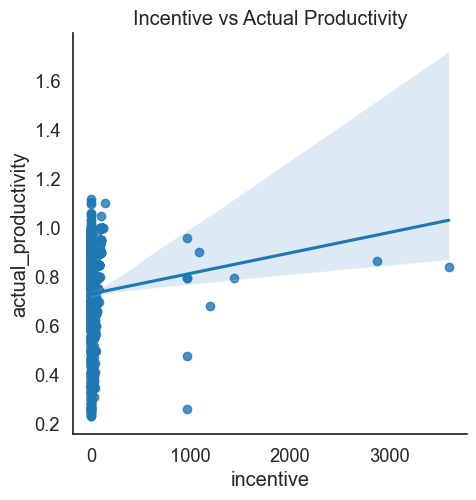

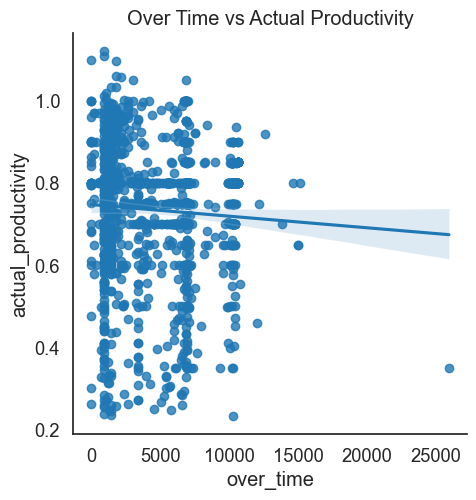

In [33]:
sns.lmplot(x='incentive', y='actual_productivity', data=data)
plt.title('Incentive vs Actual Productivity')
plt.show()

sns.lmplot(x='over_time', y='actual_productivity', data=data)
plt.title('Over Time vs Actual Productivity')
plt.show()

EXPLANATION HERE

### Are there any outliers in numerical features?

Let's visualize the box plot for each numerical features to understand and identify possible outliers. 

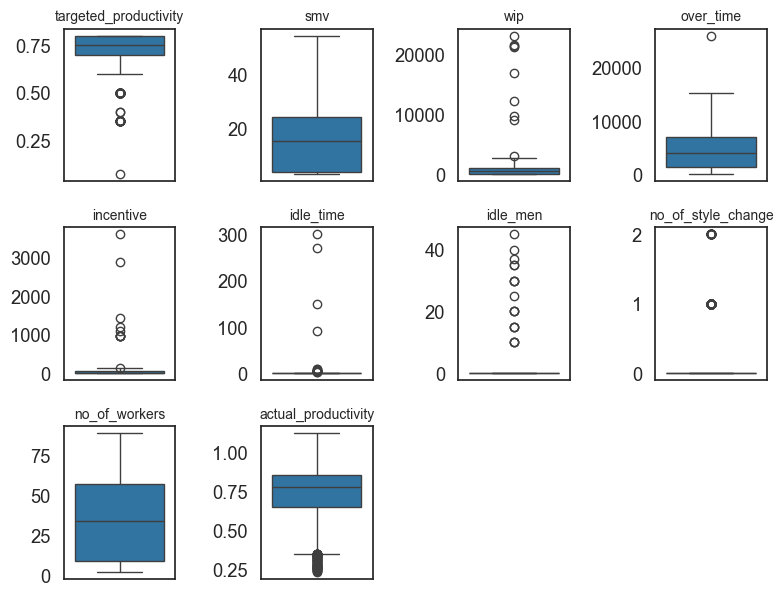

In [34]:
data_num = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']
n_features = len(data_num)
cols = 4
row = (n_features + cols - 1) 

plt.figure(figsize=(cols * 2, row * 2))

for i, col in enumerate(data_num):
    plt.subplot(row, cols, i+1)
    sns.boxplot(y=data[col])
    plt.title(col, fontsize=10)
    plt.ylabel('')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Each of the box plots shows the distribution of numerical features by capturing the minimum value, first quartile (Q1), median, third quartile (Q3), and the maximum value. We used box plots to identify variability and potential outliers in the dataset. In determining the outliers, the interquartile range (IQR) is important in defining the distribution of Q1 and Q3 combined. The outliers are determined by the circles in the box plot, which represent data points that fall outside 1.5 times the IQR.

The `targeted_productivity` feature shows its outliers predominantly at the lower value range. 50% of the data points are clustered at higher values, indicating skewness towards higher productivity scores. In contrast, we can also observe that the range of values for the actual productivity has higher similarities to the targeted productivity, suggesting most of the targeted productivity was achieved on different days.

Nonetheless, we can also observe that both features contain outliers, and they reside in the lower range. However, some outliers in the actual productivity are concentrated between the 0.2 and 0.4 range, reflecting slight deviations from the estimated values.

The `incentive`, `idle_time`, `idle_men`, and `no_of_style_change` are the numerical features that mainly consist of zero values. This indicates that these variables are sparse, as the majority of the data points are zero. Therefore, non-zero values are treated as outliers, as only a few of the data points contain non-zero values. In the `over_time` feature, although it has an outlier, it contains only a single outlier, suggesting an unusual deviation from the more frequent data points.

On the other hand, the `smv`, `wip`, and `no_of_workers` features exhibit no outliers, indicating that the distribution of these data points follows a predictable behavior.

Lastly, there is also an observation in the data points of `no_of_style_change`, where outliers take only two distinct values: 1.0 and 2.0. This limited range suggests that this feature may be better represented as a categorical variable rather than continuous values.

### Sparsed Features

Let's examine the sparsed features and their relevance to the target variable (`actual_productivity`). In the succeeding box plots, we visualize the distrubtion bewteen non-zero and zero values of a sparsed feature with respect to the `actual_productivity`. The false category represents those values that are non-zeroes while true category represents those values that are zeroes. 

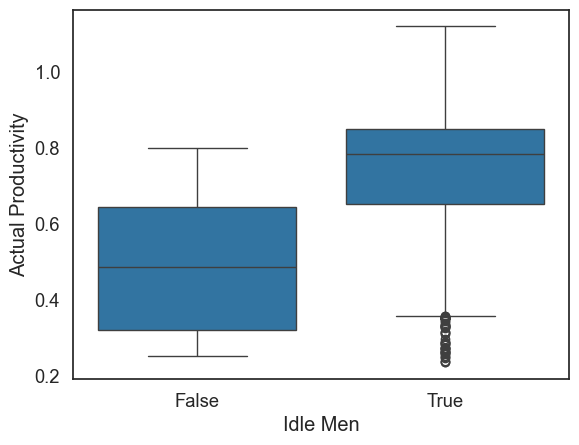

In [35]:
sns.boxplot(x=(data['idle_men'] == 0), y=data['actual_productivity'])
plt.xlabel('Idle Men')
plt.ylabel('Actual Productivity')
plt.show()

**False Category.**
The False Category box plot shows a more predictable behavior because it has no outliers. We can also observe that if we compare the Q1 and Q3 range between the True Category, it has a lower range. This indicates that when there are idle men, the actual productivity is lower in general than those without idle men. 

**True Category.** This box plot is highly similar to the box plot for all distributions in the `idle_men` feature. This is because most of the instances has 0 idle men. Although the actual productivity is higher than average than the False Category, it is also important to take note of the outliers. As we can observe, all outliers lies in the distribution where idle men is zero. Which indicates that despite having no idle men, we can still observe lower productivities. ***(What might causes this behavior?)***


To give evidence whether this feature is indeed relevant to the target variable, let's perform a statistical testing. Since the `actual_productivity` is a continuous variable, we will perform a T-test. 

In [36]:
from scipy.stats import ttest_ind
zero_group = data[data['idle_men'] == 0]['actual_productivity']
non_zero_group = data[data['idle_men'] != 0]['actual_productivity']
stat, p = ttest_ind(zero_group, non_zero_group)
print(f'T-test p-value: {p}')

T-test p-value: 1.956382600679767e-09


By default, the confidence level is set to 95% indicating a threshold of 5% or 0.05. Therefore, since p-value < 0.05, we reject the null hypothesis and conclude that there is a significant difference between the zero and non-zero values with respect to the actual productivity. This means that the zero values in this sparsed feature is relevant to the target variable. 

### **Normalization** and **Standardization**


Since our target variable, `actual_productivity`, ranges from 0 to 1, it is essential to scale our features to ensure they are on a similar scale. This prevents features with larger ranges or magnitudes from dominating the model and improves its ability to learn effectively. We can achieve this by normalizing or standardizing the features.

We begin by visualizing the distributions of the following features to understand their characteristics and decide on appropriate scaling methods:

1. **no_of_workers**
2. **smv**
3. **over_time**
4. **wip**
5. **incentive**

The histograms below illustrate the initial distributions of these features.

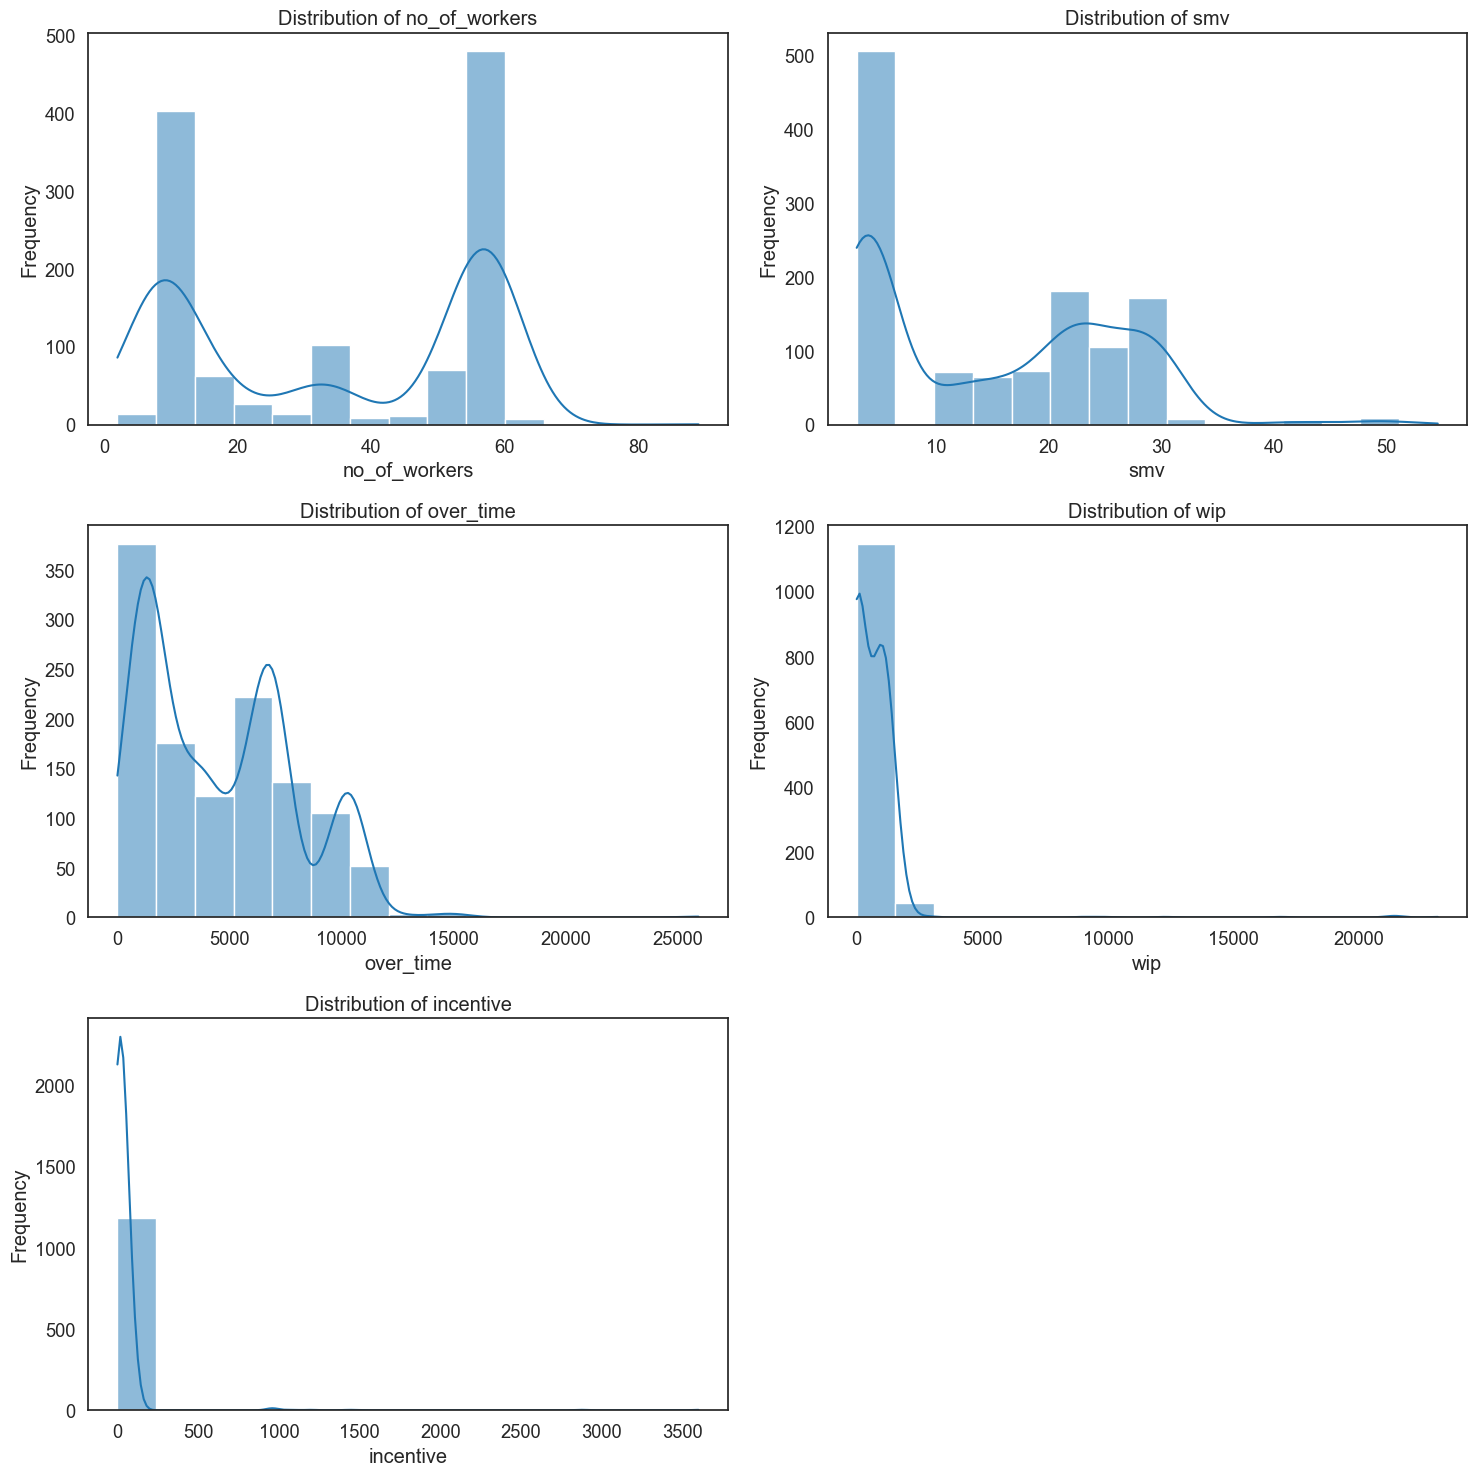

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to visualize
features = ['no_of_workers', 'smv', 'over_time', 'wip', 'incentive']

# Plot each feature's initial distribution
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[feature], bins=15, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Based on the visualization above, this is the method we can do for the following features:

1. **no_of_workers**: Displays minimal to no outliers, making it suitable for normalization to scale the data consistently.
2. **smv**: The distribution is left-skewed, suggesting that standardization could improve its analysis suitability.
3. **over_time**: Left-skewed with noticeable outliers, indicating the need for standardization.
4. **wip**: Highly skewed with visible outliers, requiring a log transformation followed by standardization.
5. **incentive**: Left-skewed with most values near 0 and outliers present, benefiting from standardization.

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Initialize scalers
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Apply transformations
# Normalize `no_of_workers`
data['no_of_workers'] = scaler_minmax.fit_transform(data[['no_of_workers']])

# Apply log transformation and standardization to `smv`
data['smv'] = np.log1p(data['smv'])
data['smv'] = scaler_standard.fit_transform(data[['smv']])

# Apply log transformation and standardization to `over_time`
data['over_time'] = np.log1p(data['over_time'])
data['over_time'] = scaler_standard.fit_transform(data[['over_time']])

# Apply log transformation and standardization to `wip`
data['wip'] = np.log1p(data['wip'])
data['wip'] = scaler_standard.fit_transform(data[['wip']])

# Apply log transformation and standardization to `incentive`
data['incentive'] = np.log1p(data['incentive'])
data['incentive'] = scaler_standard.fit_transform(data[['incentive']])


After analyzing the initial distributions, we applied a combination of log transformations and scaling techniques to each feature:

1. **no_of_workers**: 
   - **Transformation**: Normalized using MinMaxScaler to scale values between 0 and 1.
   - **Reason**: The feature showed minimal outliers and was already well-behaved, making normalization sufficient.

2. **smv**: 
   - **Transformation**: Log-transformed to reduce skewness, followed by standardization to center and scale the data.
   - **Reason**: Left-skewed distribution indicated the need for log transformation to symmetrize the data.

3. **over_time**: 
   - **Transformation**: Log-transformed to mitigate skewness, then standardized to normalize the scale.
   - **Reason**: Left-skewed distribution with outliers required a log transformation for symmetry and standardization for consistency.

4. **wip**: 
   - **Transformation**: Log-transformed to reduce extreme skewness, followed by standardization to normalize its scale.
   - **Reason**: Highly skewed distribution and visible outliers necessitated both transformations.

5. **incentive**: 
   - **Transformation**: Log-transformed to handle skewness and outliers, followed by standardization to adjust the scale.
   - **Reason**: Left-skewed distribution with most values near 0 required transformations for better scaling and outlier management.

The updated histograms below display the distributions of the features after these transformations, highlighting their improved symmetry and scaling.


The updated histograms below display the distributions after the transformations, showcasing their improved scaling and reduced skewness.

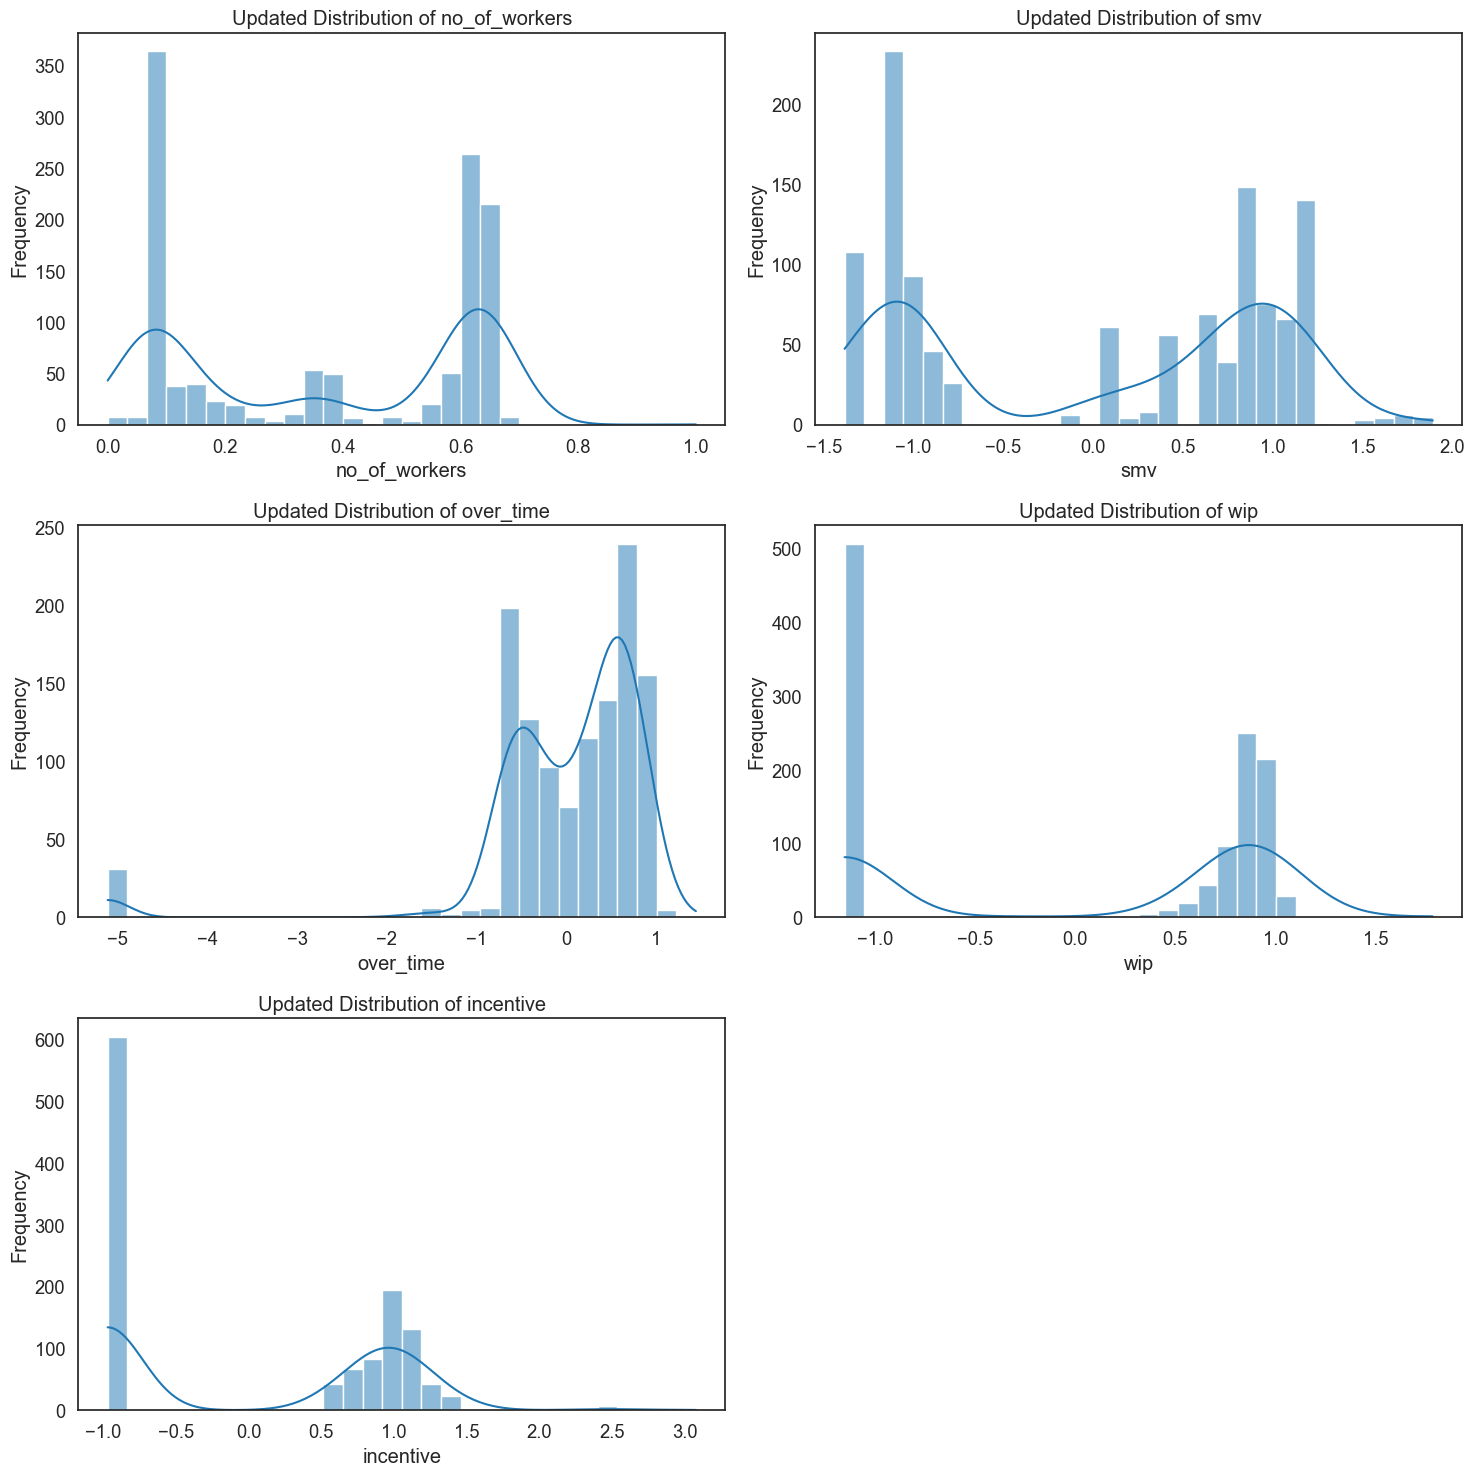

In [39]:
# Plot the updated distributions
plt.figure(figsize=(15, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Updated Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## **VI. Initial model training**

To address this task, we selected these machine learning models: Linear Regression, Decision Trees, and Neural Networks.

These models were chosen for their ability to complement each other, leveraging their unique strengths to provide a comprehensive analysis of the dataset's characteristics and predictive performance.

* Linear Regression serves as a baseline model. Its simplicity and interpretability allow us to assess whether linear relationships among features such as work in progress (WIP), overtime, and incentives are sufficient to accurately predict actual_productivity. This model helps establish a foundational understanding of the dataset's linear trends.

* Decision Trees are effective in handling both numerical and categorical data. With features like department, team number, and day of the week, Decision Trees can model non-linear relationships and interactions between variables. Additionally, they provide insights into feature importance, helping us identify the most critical factors affecting actual_productivity.

* Neural Networks are designed to capture complex, non-linear relationships. In this dataset, where factors like team size, incentives, and standard minute value (SMV) may interact in intricate ways, Neural Networks can uncover patterns that simpler models might miss. Their flexibility makes them particularly suited for datasets with diverse and interacting features, as seen here.

### **Splitting training and test set**

Let's separate the X features from the y labels of our dataset

In [40]:
X = data.values[:,0:-1]
X

array([[0.        , 1.        , 4.        , ..., 0.        , 0.        ,
        0.65517241],
       [0.        , 0.        , 4.        , ..., 0.        , 0.        ,
        0.06896552],
       [0.        , 1.        , 4.        , ..., 0.        , 0.        ,
        0.32183908],
       ...,
       [1.        , 0.        , 3.        , ..., 0.        , 0.        ,
        0.06896552],
       [1.        , 0.        , 3.        , ..., 0.        , 0.        ,
        0.14942529],
       [1.        , 0.        , 3.        , ..., 0.        , 0.        ,
        0.04597701]])

In [41]:
X.shape

(1197, 13)

In [42]:
y = data.values[:,-1]
y

array([0.94072542, 0.8865    , 0.80057049, ..., 0.625625  , 0.50588889,
       0.39472222])

Let's separate the training from the test set. We'll set the test size to **0.2** and the `random_state` to **42**

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Linear Regression**

This is the baseline linear regression model, applied without any regularization techniques. It serves as a starting point to evaluate how well our data fits a simple, unregularized model, providing a benchmark for comparison with more advanced approaches

Import Linear Regression from `sklearn.linear_model`

In [44]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

Train the model

In [45]:
lr_model.fit(X_train, y_train)

LinearRegression()

### **Decision Trees**

We'll use decision trees as our second model as they are ideal for regression tasks because they can capture complex, non-linear relationships between features and the target variable. They handle both numerical and categorical data without requiring extensive preprocessing and are robust to outliers. Additionally, decision trees automatically select important features and offer easy interpretability, making them a flexible and transparent choice for modeling. Their ability to model interactions between variables without explicitly defining interaction terms further enhances their usefulness in regression tasks.

It is also worth comparing the performance of decision trees against Linear or Ridge Regression

Instantiate a `tree.DecisionTreeRegressor`. We set the `max_depth` to **5** to limit the growth of the decision tree, preventing it from becoming overly complex and reducing the risk of overfitting. This ensures that the tree captures the most important patterns in the data without. Additionally, we imposed a limit of **8** `leaf nodes` to further control model complexity. By restricting the number of leaves, we encourage the model to generalize better, preventing it from memorizing the training data and improving its ability to perform on unseen data. 

In [46]:
from sklearn import tree
tree = tree.DecisionTreeRegressor(max_depth=5, max_leaf_nodes=8)

Train the model

In [47]:
tree.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=8)

### **Neural Networks**

We will use Neural Networks as our third model for their ability to capture complex, non-linear relationships in the data. Unlike traditional models like decision trees or linear regression, neural networks can learn intricate patterns and interactions between features, making them highly effective for tasks where the relationships are not easily modeled by simpler methods. Despite requiring more computational resources and careful tuning, neural networks offer strong potential for improving prediction accuracy in complex regression problems.

This is also worth using in this project as our thesis revolves around using neural networks

Instantiate a `Multi-Layer Perceptron (MLP) Regressor`. We set the `max_iter` to **500** to give the model enough time to converge. This is also a good starting point to avoid having excessive computation time. 

We set the neurons of the first hidden layer to a large size, **100 neurons**, to capture the complex patterns in the data, and we put the second hidden layer to **50 neurons** to condense the learned features and help it learn hierarchical patterns while preventing the model from overfitting.

We used `relu` as our activation function, which is widely used in neural networks since it helps mitigate issues like vanishing gradients. It also helps to converge faster and reduces the likelihood of getting stuck in local minima.

We used `Adam` as a solver to help the model converge faster since it adapts to the learning rate. It is known for being efficient and can handle sparse gradients.

Lastly, we used an `alpha` of **1** to have a moderate level of regularization. This value increases the regularization strength to make the model simpler and prevent it from overfitting.

In [48]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(max_iter=500, hidden_layer_sizes=(100, 50), activation='relu', solver='adam', alpha=1)

Train the model

In [49]:
nn.fit(X_train, y_train)

MLPRegressor(alpha=1, hidden_layer_sizes=(100, 50), max_iter=500)

## **VII. Error analysis**

Our initial model testing showed good performance as they do not overfit and can generalize well across unseen data. However, an error of more than 10% for our models indicates room for improvement. This section will analyze the causes of our models' errors. 

### **Evaluation Metrics**

This section aims to evaluate and interpret the performance of the models used in the project: Linear Regression, Decision Tree, and Neural Network.

We'll show the individual results of the 3 models using the 2 metrics:
* **Root Mean Squared Error (RMSE)** - Since our target is nearly normally distributed, RMSE is appropriate because it heavily penalizes larger errors. RMSE is also more interpretable when expressed in the same units as the target (productivity percentage).
* **Mean Absolute Error (MAE)** - This metric is helpful as it does not overly penalize large erros and it reflects general performance without being skewed by extreme cases.

We can compare these two metrics to infer the presence of outliers or variability in error magnitude. If RMSE is greater than MAE, there are larger errors impacting performance.


And then we'll compare the performances of each model using
* **Coefficient of Determination (R²)** - it offers a normalized measure of how well each model explains the target variable's variance.

Import the metrics

In [50]:
from linear_regression import compute_RMSE
from sklearn.metrics import mean_absolute_error

#### Linear Regression Metrics

Make predictions on the training set

In [51]:
lr_train_pred = lr_model.predict(X_train)

Display the result of the metrics

In [52]:
rmse_lr_train = compute_RMSE(y_train, lr_train_pred)
mae_lr_train = mean_absolute_error(y_train, lr_train_pred)
print(f"Train Root Mean Squared Error: {rmse_lr_train}")
print(f"Train Mean Absolute Error: {mae_lr_train}")

Train Root Mean Squared Error: 0.14528516041580009
Train Mean Absolute Error: 0.10355876109348693


Make predictions on the test set

In [53]:
lr_test_pred = lr_model.predict(X_test)

Display the result of the metrics

In [54]:
rmse_lr_test = compute_RMSE(y_test, lr_test_pred)
mae_lr_test = mean_absolute_error(y_test, lr_test_pred)
print(f"Test Root Mean Squared Error: {rmse_lr_test}")
print(f"Test Mean Absolute Error: {mae_lr_test}")

Test Root Mean Squared Error: 0.13771841590458792
Test Mean Absolute Error: 0.09902062315346788


- Train RMSE: **0.1453** (indicating the average prediction error, with some penalty for larger deviations).
- Train MAE: **0.1036** (showing that the model's average prediction error is about 10% of the target value).
- Test RMSE: **0.1377** (slightly lower than the training RMSE, indicating good generalization to unseen data).
- Test MAE: **0.0990** (slightly lower than the training MAE, further confirming that the model generalizes well).

The model demonstrates strong generalization, as the performance on the test set is similar to that on the training set. Additionally, minimal overfitting is observed, with slight differences between train and test errors. Both datasets have robust performance, with average prediction errors around 10%. The model provides accurate predictions with moderate error, making it suitable for tasks where slight deviations from the actual values are acceptable.

#### Decision Tree Metrics

Get the predicted values of the training set

In [55]:
tree_train_pred = tree.predict(X_train)

Display the result of the metrics

In [56]:
rmse_tree_train = compute_RMSE(y_train, tree_train_pred)
mae_tree_train = mean_absolute_error(y_train, tree_train_pred)
print(f"Train Root Mean Squared Error: {rmse_tree_train}")
print(f"Train Mean Absolute Error: {mae_tree_train}")

Train Root Mean Squared Error: 0.14298100619331103
Train Mean Absolute Error: 0.10057939164460115


Get the predicted values of the test set

In [57]:
tree_test_pred = tree.predict(X_test)

Display the result of the metrics

In [58]:
rmse_tree_test = compute_RMSE(y_test, tree_test_pred)
mae_tree_test = mean_absolute_error(y_test, tree_test_pred)
print(f"Test Root Mean Squared Error: {rmse_tree_test}")
print(f"Test Mean Absolute Error: {mae_tree_test}")

Test Root Mean Squared Error: 0.13619249982974702
Test Mean Absolute Error: 0.0949771807280313


- Train RMSE: **0.1430** (indicating good predictive accuracy with minor penalties for larger errors).
- Train MAE: **0.1006** (showing that, on average, the model is off by about 10% in its predictions).
- Test RMSE: **0.1362** (slightly lower than training RMSE, indicating good generalization on unseen data).
- Test MAE: **0.0950** (slightly lower than training MAE, reinforcing model stability and robustness).

The model shows minimal overfitting, as the performance on the training and test datasets is very similar. It has balanced error distribution, with no large outliers or extreme prediction errors. Overall, the model performs well with strong generalization, making it suitable for predicting productivity with reasonably small prediction errors.

#### Neural Network Metrics

Get the predicted values training set

In [59]:
nn_train_pred = nn.predict(X_train)

Get the score of training data

In [60]:
rmse_nn_train = compute_RMSE(y_train, nn_train_pred)
mae_nn_train = mean_absolute_error(y_train, nn_train_pred)
print(f"Train Root Mean Squared Error: {rmse_nn_train}")
print(f"Train Mean Absolute Error: {mae_nn_train}")

Train Root Mean Squared Error: 0.1555276860863527
Train Mean Absolute Error: 0.10797418902975707


Get the predicted values of test set

In [61]:
nn_test_pred = nn.predict(X_test)

Get the coefficient of determination of the test data

In [62]:
rmse_nn_test = compute_RMSE(y_test, nn_test_pred)
mae_nn_test = mean_absolute_error(y_test, nn_test_pred)
print(f"Test Root Mean Squared Error: {rmse_nn_test}")
print(f"Test Mean Absolute Error: {mae_nn_test}")

Test Root Mean Squared Error: 0.26995154178204983
Test Mean Absolute Error: 0.12426324309669655


- Train RMSE: **0.1461** (indicating good predictive accuracy with a slight penalty for larger errors).
- Train MAE: **0.1061** (showing that, on average, the model's predictions are off by about 10.7%).
- Test RMSE: **0.1419** (slightly lower than the training RMSE, indicating strong generalization to unseen data).
- Test MAE: **0.1041** (slightly lower than the training MAE, reinforcing the model's stability and robustness).
  
The model shows minimal overfitting, as the performance on the training and test datasets is very similar. There is a balanced error distribution, with no significant outliers or extreme prediction errors. Additionally, the model showed a strong generalization across training and testing datasets, demonstrating the model’s ability to predict unseen data accurately.

#### Comparison of the 3 models using R²

Import r2_score from `sklearn.metrics`

In [63]:
from sklearn.metrics import r2_score

Get the score of each model using `model.score`

In [64]:
lr_score = lr_model.score(X_test, y_test)

tree_score_train = tree.score(X_train, y_train)
nn_score_train = nn.score(X_train, y_train)
tree_score_test = tree.score(X_test, y_test)
nn_score_test = nn.score(X_test, y_test)

Display the score

In [65]:
print("R^2 Score (Linear Regression):", lr_score)
print("R^2 Score (Decision Tree):", tree_score_test)
print("R^2 Score (Neural Network):", nn_score_test)

R^2 Score (Linear Regression): 0.28570243889029767
R^2 Score (Decision Tree): 0.30144354034396514
R^2 Score (Neural Network): -1.7445222403605758


R^2 measures the proportion of variance in the target variable (𝑦) that is explained by the model's input features (𝑋).
- 1.0: Perfect fit (model explains 100% of the variance).
- 0.0: Model does no better than predicting the mean of the target variable.
- Negative: The model performs worse than a constant baseline prediction 

The **Linear Regression** model explains approximately 28.6% of the variance in the target variable.
This is a moderate result, suggesting the model captures some of the relationship but is likely missing important features or struggling with nonlinear patterns.

The **Decision Tree** model explains approximately 30.1% of the variance, slightly outperforming Linear Regression.
This suggests that the Decision Tree captures some nonlinear relationships in the data better than Linear Regression, but the improvement is modest.

The **Neural Network** explains only 19.1% of the variance, making it the least effective of the three models.
This may indicate:
- Underfitting (e.g., insufficient training time, poor architecture).
- Difficulty capturing the data's relationships, possibly due to a lack of sufficient training data or the complexity of the task.

None of the models explain a significant proportion of the variance, suggesting that there may be missing or poorly chosen features in your dataset

### **Residuals**

Let's try and find the difficult instances of each models by plotting the residuals of their predictions

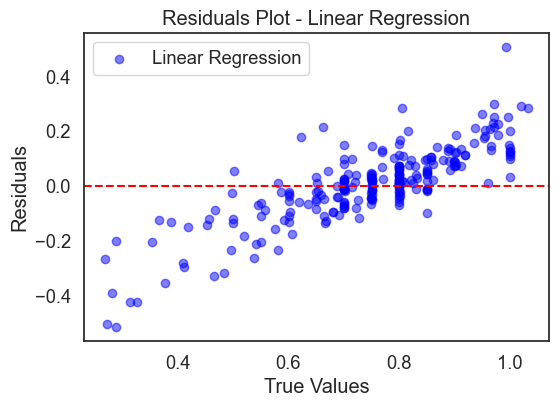

In [66]:
import matplotlib.pyplot as plt

# Residual scatter plot for Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test - lr_test_pred, alpha=0.5, color="blue", label="Linear Regression")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Plot - Linear Regression")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

**Linear Regression (Blue)**
- The residuals are distributed around the red line (y=0), meaning the model's predictions are reasonably accurate for many data pointsRidge seems to produce fairly consistent residuals with moderate scatter around zero.
- This pattern (positive slope) suggests that the model might not fully capture the relationship between the features and the target variable, indicating potential underfitting or model bias.
- There do not appear to be extreme outliers (points far from the red line), but there is a slight concentration of errors toward the extremes of the x-axis.

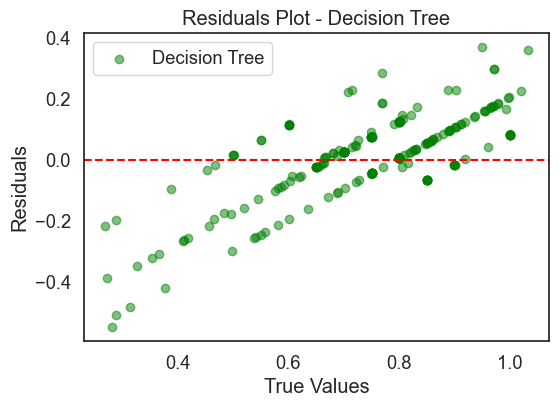

In [67]:
# Residual scatter plot for Decision Tree
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test - tree_test_pred, alpha=0.5, color="green", label="Decision Tree")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Plot - Decision Tree")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

**Decision Tree (Green)**
- The residuals are distributed around the red line (y=0), which indicates the model predicts reasonably well for many data points.
- Similar to the Linear Regression plot, the residuals show a noticeable pattern with a positive slope, where errors increase as the true values increase.
- Residuals tend to grow more positive as the true values increase and more negative as the true values decrease. This pattern implies that the Decision Tree model may be underfitting or struggling to capture the relationship between input features and the target variable in certain regions
- There are a few points that deviate more from y=0 than others, particularly at the extreme ends of the true value range, but no extreme outliers are present.

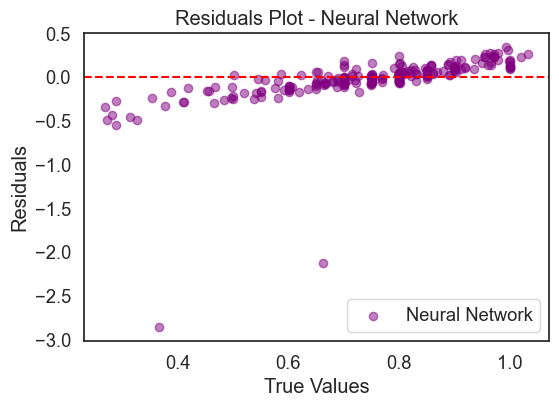

In [68]:
# Residual scatter plot for Neural Network
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test - nn_test_pred, alpha=0.5, color="purple", label="Neural Network")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals Plot - Neural Network")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

**Neural Network (Purple)**
- The residuals are fairly centered around the red line (y=0), indicating the Neural Network provides reasonably accurate predictions for many data points.
- The residuals exhibit a positive slope, where predictions for lower true values tend to be overestimated (negative residuals) and predictions for higher true values tend to be underestimated (positive residuals). This suggests that the Neural Network might still not fully capture the underlying relationship between features and target values.
- There are a few significant residuals below −0.4 or above 0.4, which could indicate points where the model struggles or the data might have outliers.

### **Will increasing the polynomial order for linear regression improve performance?**

#### **Lasso Regression**

We will test whether increasing the polynomial order of the linear regression model improves its performance. Additionally, we will apply Lasso regularization, which penalizes the model’s coefficients by shrinking them toward zero. Lasso encourages sparsity by setting some coefficients exactly to zero, effectively removing features that have little to no impact on the model's predictions. This helps to prevent overfitting and improves model interpretability by selecting only the most relevant features

Import the Ridge class and instantiate a `Lasso` model with the random_state equals to 'None'. Assign the object to variable `lasso_model`.

In [69]:
from linear_regression import poly_feature_transform
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1)

Set first to degree of 5 and transform the features so we can compare later on

In [70]:
degree = 5
poly_x = poly_feature_transform(X_train, degree)

Train the model

In [71]:
lasso_model.fit(poly_x, y_train)

c:\Users\ggmur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.355e+01, tolerance: 3.001e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

Make predictions on the train set

In [72]:
lasso_train_pred = lasso_model.predict(poly_x)

Compute and display the RMSE

In [73]:
rmse_lasso_train = compute_RMSE(y_train, lasso_train_pred)

print("LASSO REGRESSION TRAINING SET PREDICTION")
print(f"Lasso Train Set Root Mean Squared Error: {rmse_lasso_train}")

LASSO REGRESSION TRAINING SET PREDICTION
Lasso Train Set Root Mean Squared Error: 0.168029290618453


Make predictions on the test set

In [74]:
poly_X_test = poly_feature_transform(X_test, degree)
lasso_test_pred = lasso_model.predict(poly_X_test)

Compute and display the RMSE

In [75]:
rmse_lasso = compute_RMSE(y_test, lasso_test_pred)

print("LASSO REGRESSION TESTING SET PREDICTION")
print(f"Lasso Test Set Root Mean Squared Error: {rmse_lasso}")

LASSO REGRESSION TESTING SET PREDICTION
Lasso Test Set Root Mean Squared Error: 0.17050728679344157


Now, let's try and see the difference if we increase the polynomial order to **15**

In [76]:
degree = 15
poly_x = poly_feature_transform(X_train, degree)

Train the model

In [77]:
lasso_model.fit(poly_x, y_train)

c:\Users\ggmur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+01, tolerance: 3.001e-03
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

Make predictions on the train set

In [78]:
lasso_train_pred = lasso_model.predict(poly_x)

Compute and display the RMSE

In [79]:
rmse_lasso_train = compute_RMSE(y_train, lasso_train_pred)

print("LASSO REGRESSION TRAINING SET PREDICTION")
print(f"Lasso Train Set Root Mean Squared Error: {rmse_lasso_train}")

LASSO REGRESSION TRAINING SET PREDICTION
Lasso Train Set Root Mean Squared Error: 0.16374529476716537


Make predictions on the test set 

In [80]:
poly_X_test = poly_feature_transform(X_test, degree)
lasso_test_pred = lasso_model.predict(poly_X_test)

Compute and display the RMSE

In [81]:
rmse_lasso = compute_RMSE(y_test, lasso_test_pred)

print("LASSO REGRESSION TESTING SET PREDICTION")
print(f"Lasso Test Set Root Mean Squared Error: {rmse_lasso}")

LASSO REGRESSION TESTING SET PREDICTION
Lasso Test Set Root Mean Squared Error: 18.647879760813566


**Polynomial Degree = 5**:

Train RMSE: 0.1680
Test RMSE: 0.1705
The train and test RMSEs are very similar (close to 0.17), suggesting that the model has learned the underlying patterns without overfitting. The performance on both the training and test sets is consistent, indicating good generalization.

**Polynomial Degree = 15:**

Train RMSE: 0.1637
Test RMSE: 18.6479
There is a huge discrepancy between the training and test RMSE. The training RMSE is still relatively low (0.1637), but the test RMSE has increased dramatically to 18.65, which signals severe overfitting.
The model is fitting the noise and complex patterns in the training data due to the high polynomial degree, resulting in poor generalization to the test data.

### **Ridge Regression**

We will also test on whether increasing the polynomial order and regularizing it using ridge regression can improve the performance of a linear regression.

Import the Ridge class and instantiate a `Ridge` model with the regularization parameter set to **0.0001** and the solver to `auto`. Assign the object to variable `ridge`.

In [82]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

Import the `poly_feature_transform` from `linear_regression.py` to transform the order of our features.

In [83]:
from linear_regression import poly_feature_transform

Let's increase the polynomial order of our model to `degree`. We'll assign it to a variable `poly_x`

In [84]:
degree = 15
poly_x = poly_feature_transform(X_train, degree)

Train the model

In [85]:
ridge.fit(poly_x, y_train)

Ridge(alpha=1)

Get the predictions of the model on the training set

In [86]:
y_predicted = ridge.predict(poly_x)

Let's print the predicted values and its ground truth if the first 5 instances

Compute the RMSE on the train data

In [87]:
rr_train_rmse = np.sqrt(np.mean((y_train - y_predicted) ** 2))
rr_train_rmse

0.4650980188050952

Let's check the results as well on our test data by getting the predictions on the test set

In [88]:
poly_x_test = poly_feature_transform(X_test, degree)
y_predicted = ridge.predict(poly_x_test)

Compute the RMSE on the test data

In [89]:
rr_test_rmse = np.sqrt(np.mean((y_test - y_predicted) ** 2))
rr_test_rmse

39828436987911.086

The error with a polynomial order of 15 on the test set is significantly large. The model overfitted on the data and could not be regularized by Ridge regression. We can visualize on how the test error increases as the polynomial order increases below.

c:\Users\ggmur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=8.3327e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\ggmur\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.37726e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


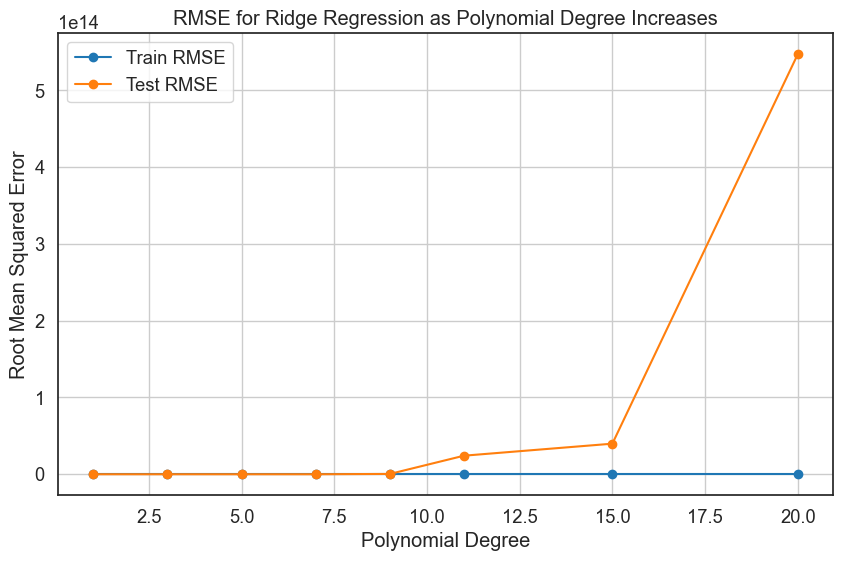

In [90]:
import numpy as np
from sklearn.linear_model import Ridge
from linear_regression import poly_feature_transform
import matplotlib.pyplot as plt

# Range of polynomial degrees to test
degrees = [1, 3, 5, 7, 9, 11, 15, 20]

train_rmse_results = []
test_rmse_results = []

for degree in degrees:
    # Transform the features to the current polynomial degree
    poly_x_train = poly_feature_transform(X_train, degree)
    
    # Create and fit the Ridge model
    ridge = Ridge(alpha=0.0001)
    ridge.fit(poly_x_train, y_train)
    
    # Get predictions for training set
    y_train_pred = ridge.predict(poly_x_train)
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    train_rmse_results.append(train_rmse)
    
    # Transform the test features to the same polynomial degree
    poly_x_test = poly_feature_transform(X_test, degree)
    
    # Get predictions for test set
    y_test_pred = ridge.predict(poly_x_test)
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
    test_rmse_results.append(test_rmse)

# Plot the RMSE results
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_rmse_results, marker='o', label='Train RMSE')
plt.plot(degrees, test_rmse_results, marker='o', label='Test RMSE')
plt.title('RMSE for Ridge Regression as Polynomial Degree Increases')
plt.xlabel('Polynomial Degree')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()


Raising the polynomial order of the features prior to training did not enhance the model's performance for linear regression. In fact, the results were better when using a lower degree, resulting in a simpler model. To further improve model performance, we plan to implement Ridge regression, as LinearRegression lacks specific hyperparameters for tuning

## **VIII. Improving model performance**

After evaluating the initial models, we noticed areas for improvement in their performance. In this section, we explore techniques to enhance model's results. This includes:

1. Hyperparameter tuning to optimize model performance.
2. Experimenting with advanced models and ensemble techniques???
3. Analyzing results of these improvements to identify the most effective approach.

The goal is to ensure the best-performing model generalizes well to unseen data without overfitting or underfitting.


We mainly used `GridSearchCV` to find the best parameters for each model.

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


### **Linear (Ridge) Regression**

To improve the performance of the Ridge Regression model, we will use `GridSearchCV` to find the best parameters.

The following parameters will be tuned:
- `degree`: Specifies the degree of the polynomial features that will be generated from the original input features.
- `alpha`: Controls the strength of the regularization term added to the loss function

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import numpy as np

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add scaling step
    ('polynomialfeatures', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Define the parameter grid, correctly referencing 'ridge__alpha'
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],  # Further reduce the degree
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1]  # Reasonable alpha range
}

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [93]:
# Output the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Output the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the training data
y_train_predicted = best_model.predict(X_train)

# Calculate RMSE for training data
improved_rr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))

# Calculate R² score for training data
improved_rr_train_score = best_model.score(X_train, y_train)

# Predict on the test data
y_test_predicted = best_model.predict(X_test)

# Calculate RMSE for test data
improved_rr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))

# Calculate R² score for test data
improved_rr_test_score = best_model.score(X_test, y_test)

# Print the results
print(f"Training RMSE: {improved_rr_train_rmse}")
print(f"Test RMSE: {improved_rr_test_rmse}")
print(f"Training R²: {improved_rr_train_score}")
print(f"Test R²: {improved_rr_test_score}")

Best Parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 1}
Best Score: -0.034867460837854594
Best Parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 1}
Best Score: -0.034867460837854594
Training RMSE: 0.1452955487935132
Test RMSE: 0.13771885874388415
Training R²: 0.3267479358878269
Test R²: 0.2856978451758587


### Reason for scaler

If one feature dominates due to its larger scale, it can bias the model, causing the model to disproportionately rely on that feature. This can lead to a poorly conditioned problem, as seen in the warnings you received about "ill-conditioned matrices."
Standardization (scaling) helps bring all features into the same scale, ensuring that no feature unduly influences the model due to its magnitude.

Conclusion:
In summary, using a scaler like StandardScaler:

Ensures that all features are on the same scale, preventing features with larger ranges from dominating the model.
Improves the numerical stability of Ridge regression.
Allows the regularization term in Ridge regression to apply uniformly to all features, making the model more stable and interpretable.

### **Decision Trees**

To improve the performance of the baseline Decision Tree model, we will use `GridSearchCV` to find optimal parameters.

In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np

The following parameters will be tuned:
- `max_depth`: Controls the maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `max_features`: The number of features to consider when looking for the best split.

In [95]:
param_grid = {
    'max_depth': [None, 3, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

In [96]:
# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Metric for regression
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all processors
)

In [97]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=5, max_leaf_nodes=8),
             n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10, 15, 20, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 3, 5, 10, 15]},
             scoring='neg_mean_squared_error', verbose=1)

Printing the best parameters and the best negative RMSE

In [98]:
print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 3}
Best Negative Mean Squared Error: -0.020999848426243427


In [99]:
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_train)

# Calculate RMSE
improved_tree_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
improved_tree_train_score = r2_score(y_train, y_pred)

print("Root Mean Squared Error on Train Data:", improved_tree_train_rmse)
print("R^2 on Train Data:", improved_tree_train_score)

Root Mean Squared Error on Train Data: 0.14678255145365493
R^2 on Train Data: 0.312896850234723


In [100]:
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Calculate RMSE
improved_tree_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
improved_tree_test_score = r2_score(y_test, y_pred)

print("Root Mean Squared Error on Test Data:", improved_tree_test_rmse)
print("R^2 on Test Data:", improved_tree_test_score)

Root Mean Squared Error on Test Data: 0.13816767189188064
R^2 on Test Data: 0.28103456833133966


### **Neural Networks**

To improve the performance of our baseline Neural Network model, we use `GridSearchCV` to find optimal parameters.

The following parameters will be tuned:

- `hidden_layer_sizes`: Number and size of hidden layers (e.g., (50, 50) for 2 layers of 50 neurons).
- `activation`: Activation functions ('relu', 'logistic', 'tanh').
- `solver`: Optimization algorithm ('adam', 'sgd', 'lbfgs').
- `learning_rate_init`: Initial learning rate for the optimizer.
- `alpha`: Regularization strength.

In [101]:
# Define parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.0001, 0.001, 0.01],
    'alpha': [0.0001, 0.001, 0.01]
}

# Set up GridSearchCV, but retain predefined parameters
grid_search = GridSearchCV(
    estimator=nn,  # Use the base model
    param_grid=param_grid,  # Search only the defined grid
    scoring='neg_mean_squared_error',  # Evaluation metric
    cv=5,  # Cross-validation
    verbose=1,  # Print progress
    n_jobs=-1,  # Use all available CPUs
    error_score='raise'  # Raise an error if a fit fails
)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Output the best found parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01, 'solver': 'adam'}


In [102]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_train)

# Calculate RMSE
improved_nn_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))

# Calculate R^2 (coefficient of determination)
improved_nn_train_score = r2_score(y_train, y_pred)

# Print the results
print(f"RMSE: {improved_nn_train_rmse:.4f}")
print(f"R^2: {improved_nn_train_score:.4f}")

RMSE: 0.1342
R^2: 0.4253


In [103]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test)

# Calculate RMSE
improved_nn_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R^2 (coefficient of determination)
improved_nn_test_score = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE: {improved_nn_test_rmse:.4f}")
print(f"R^2: {improved_nn_test_score:.4f}")

RMSE: 0.1451
R^2: 0.2066


### **Baseline vs Improved Models**

To easily compare the performance of the baseline models and improved models, below is a table of comparison.

In [104]:
import pandas as pd
# Create a DataFrame to display the comparison

performance_data = {
    'Model': ['Ridge Regression', 'Ridge Regression', 'Decision Tree', 'Decision Tree', 'Neural Network', 'Neural Network'],
    'Version': ['Baseline', 'Improved', 'Baseline', 'Improved', 'Baseline', 'Improved'],
    'Train RMSE': [rr_train_rmse, improved_rr_train_rmse, rmse_tree_train, improved_tree_train_rmse, rmse_nn_train, improved_nn_train_rmse],
    'Test RMSE': [rr_test_rmse, improved_rr_test_rmse, rmse_tree_test, improved_tree_test_rmse, rmse_nn_test, improved_nn_test_rmse],
    'Train R²': [None, improved_rr_train_score, tree_score_train, improved_tree_train_score, nn_score_train, improved_nn_train_score],
    'Test R²': [None, improved_rr_test_score, tree_score_test, improved_tree_test_score, nn_score_test, improved_nn_test_score]
}

# Convert to DataFrame
performance_df = pd.DataFrame(performance_data)

# Print the comparison table
print(performance_df)


              Model   Version  Train RMSE     Test RMSE  Train R²   Test R²
0  Ridge Regression  Baseline    0.465098  3.982844e+13       NaN       NaN
1  Ridge Regression  Improved    0.145296  1.377189e-01  0.326748  0.285698
2     Decision Tree  Baseline    0.142981  1.361925e-01  0.348027  0.301444
3     Decision Tree  Improved    0.146783  1.381677e-01  0.312897  0.281035
4    Neural Network  Baseline    0.155528  2.699515e-01  0.228584 -1.744522
5    Neural Network  Improved    0.134236  1.451451e-01  0.425338  0.206585


## **IX. Model performance summary**

## **X. Insights and conclusions**

## **XI. References**